In [133]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [134]:
filepath = "Iris.csv"

In [135]:
df = pd.read_csv(filepath)

In [136]:
df.columns = ["ID","sepal_lengthCm","sepal_widthCm","petal_lengthCm","petal_widthCm","species"]

In [137]:
df.species.replace({"Iris-setosa":"setosa","Iris-versicolor":"versicolor","Iris-virginica":"virginica"},inplace=True)

C:\Users\chand\AppData\Local\Temp\ipykernel_23664\1452528325.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.species.replace({"Iris-setosa":"setosa","Iris-versicolor":"versicolor","Iris-virginica":"virginica"},inplace=True)


In [138]:
df.head()

,ID,sepal_lengthCm,sepal_widthCm,petal_lengthCm,petal_widthCm,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [139]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              150 non-null    int64  
 1   sepal_lengthCm  150 non-null    float64
 2   sepal_widthCm   150 non-null    float64
 3   petal_lengthCm  150 non-null    float64
 4   petal_widthCm   150 non-null    float64
 5   species         150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**EDA**

In [140]:
df.describe()

,ID,sepal_lengthCm,sepal_widthCm,petal_lengthCm,petal_widthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [141]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

2D scatterplot

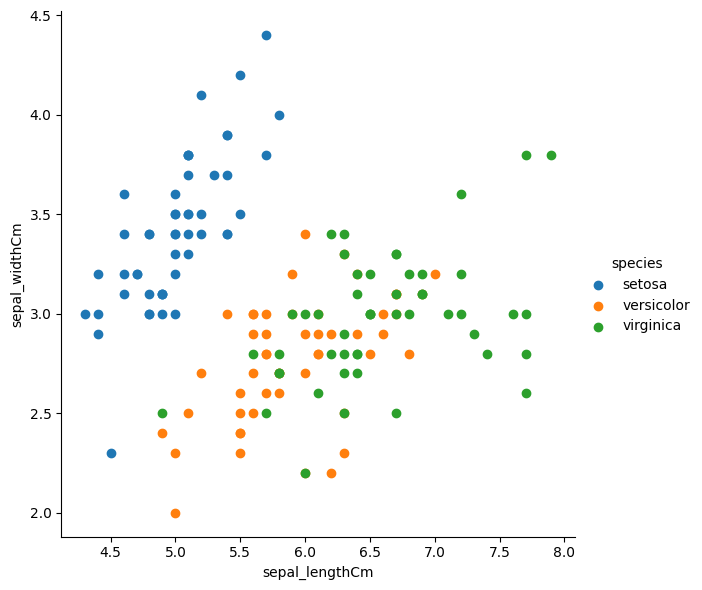

In [142]:
sns.FacetGrid (df,hue="species",height=6).map(plt.scatter,"sepal_lengthCm","sepal_widthCm").add_legend()

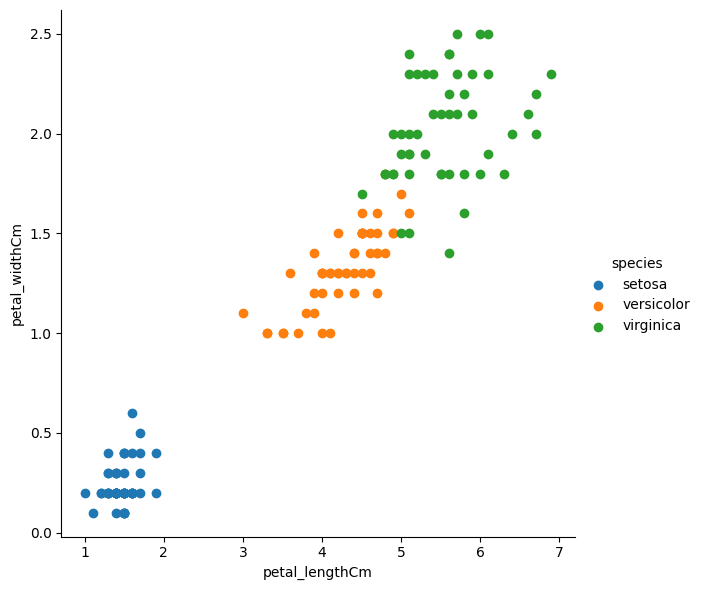

In [143]:
sns.FacetGrid (df,hue="species",height=6).map(plt.scatter,"petal_lengthCm","petal_widthCm").add_legend()

*Pairplot

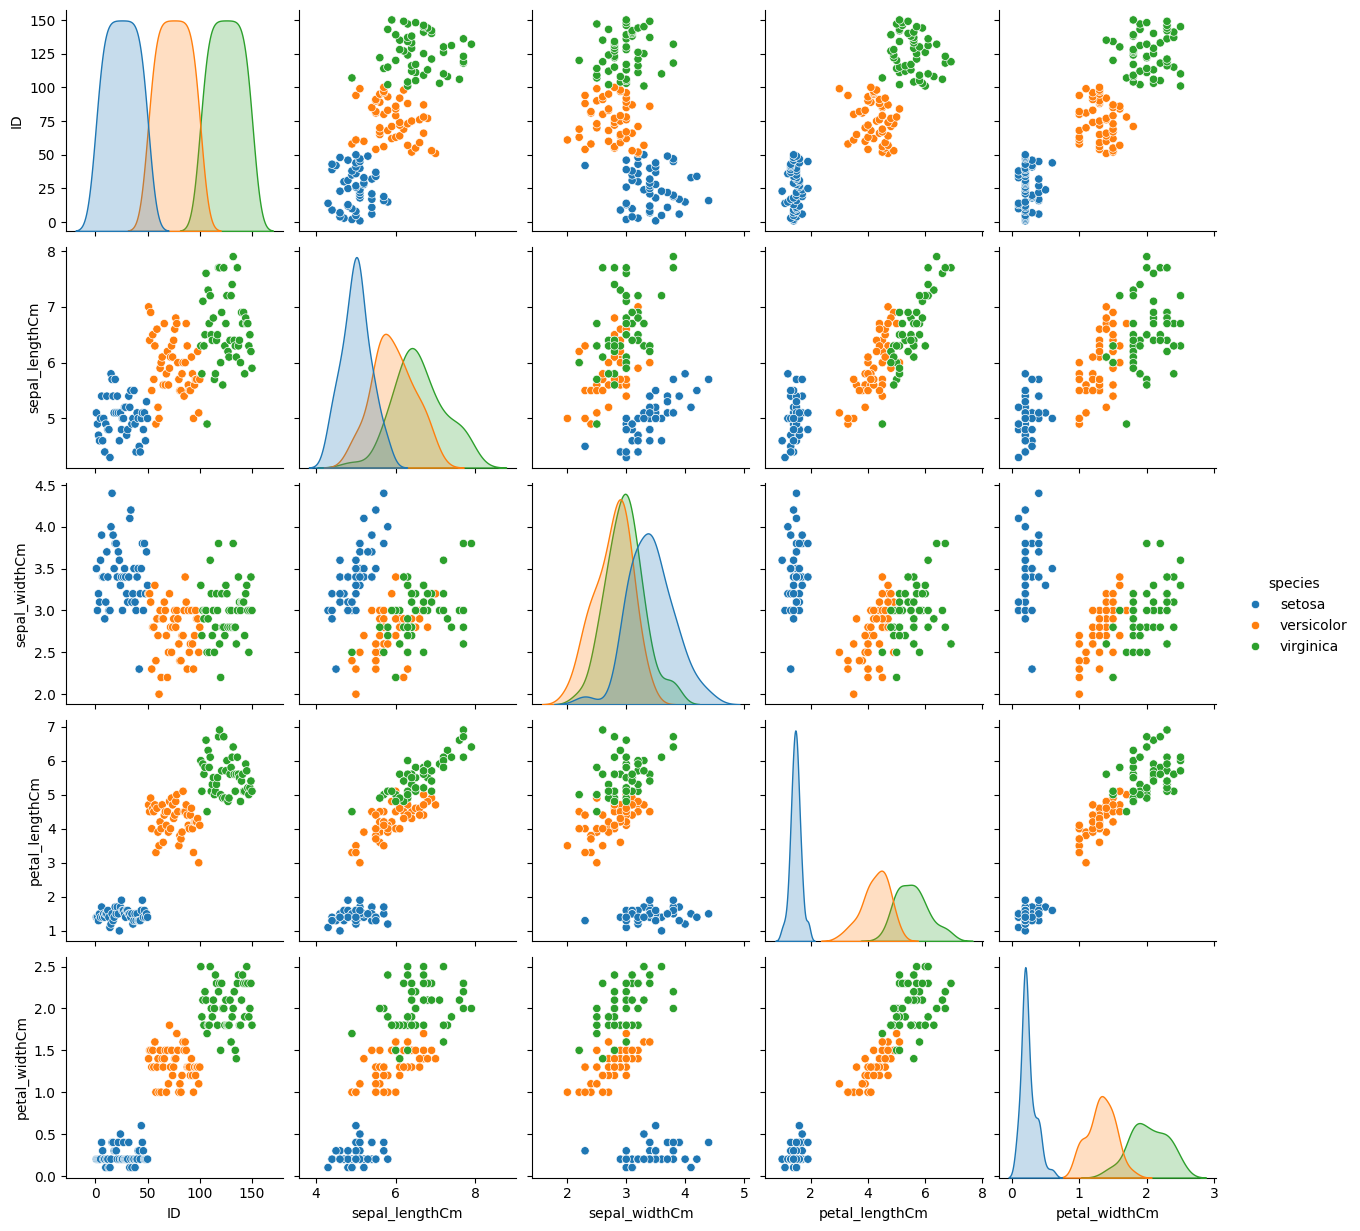

In [144]:
sns.pairplot(df,hue="species")

 **Preprocessing** 

*Feature scaling

In [165]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()


In [169]:
X = df.drop(['species'],axis=1)

In [171]:
y = df['species']

In [178]:
scaler = ss.fit(X)

In [183]:
X_stdscaler = scaler.transform(X)

In [191]:
X_stdscaler

array([[-1.72054204e+00, -9.00681170e-01,  1.03205722e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.69744751e+00, -1.14301691e+00, -1.24957601e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.67435299e+00, -1.38535265e+00,  3.37848329e-01,
        -1.39813811e+00, -1.31297673e+00],
       [-1.65125846e+00, -1.50652052e+00,  1.06445364e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.62816394e+00, -1.02184904e+00,  1.26346019e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.60506942e+00, -5.37177559e-01,  1.95766909e+00,
        -1.17067529e+00, -1.05003079e+00],
       [-1.58197489e+00, -1.50652052e+00,  8.00654259e-01,
        -1.34127240e+00, -1.18150376e+00],
       [-1.55888037e+00, -1.02184904e+00,  8.00654259e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.53578584e+00, -1.74885626e+00, -3.56360566e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.51269132e+00, -1.14301691e+00,  1.06445364e-01,
        -1.28440670e+00

*Label encoder

In [184]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [187]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [188]:
y = le.fit_transform(y)

In [189]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

*Splitting

In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

*Model_Selection

In [208]:
from sklearn.svm import SVC

In [212]:
svc = SVC(kernel ="linear")
svc.fit(X_train,y_train)


SVC(kernel='linear')

In [213]:
y_pred =svc.predict(X_test)

In [214]:
y_pred

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2,
       2])

In [220]:
from sklearn.metrics  import accuracy_score


In [222]:
accuracy_score(y_pred,y_test)

1.0